In [1]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import quantile_normalize



The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 -t 2 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory


First, we demonstrate quantile normalization for single causal mutation's phenotypic dataframe.

In [4]:
mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

In [5]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=1000, model=model_normal, random_seed=1)
sample_nodes_df = additive_effect_sizes(grg_1, trait_df_normal)
individual_genetic_value_df = samples_to_individuals(sample_nodes_df) #non-normalized genetic value df
phenotypes = sim_env_noise(individual_genetic_value_df, h2=0.5) #simulating environmental noise without normalizing genetic values
phenotype_df = phenotypes.phenotype_df
phenotype_df_1 = phenotype_df.copy()
phenotype_df_2 = phenotype_df.copy()
phenotype_df


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-16.501664,-37.884400,-54.386064
1,0,1,-2.454348,-13.641399,-16.095747
2,0,2,-17.303803,-13.900429,-31.204232
3,0,3,6.641214,5.130642,11.771856
4,0,4,-8.710213,-25.837209,-34.547421
...,...,...,...,...,...
195,0,195,12.536488,-11.398125,1.138364
196,0,196,16.549154,23.146199,39.695353
197,0,197,5.463626,5.911569,11.375194
198,0,198,-0.663779,-10.312820,-10.976599


In [6]:
quantile_normalize_phenotype_df = quantile_normalize(phenotype_df) #quantile normalized to the normal distribution
quantile_normalize_phenotype_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-16.501664,-37.884400,-54.386064,-2.326348
1,0,1,-2.454348,-13.641399,-16.095747,-0.279319
2,0,2,-17.303803,-13.900429,-31.204232,-1.126391
3,0,3,6.641214,5.130642,11.771856,1.174987
4,0,4,-8.710213,-25.837209,-34.547421,-1.253565
...,...,...,...,...,...,...
195,0,195,12.536488,-11.398125,1.138364,0.690309
196,0,196,16.549154,23.146199,39.695353,2.575829
197,0,197,5.463626,5.911569,11.375194,1.150349
198,0,198,-0.663779,-10.312820,-10.976599,-0.025069


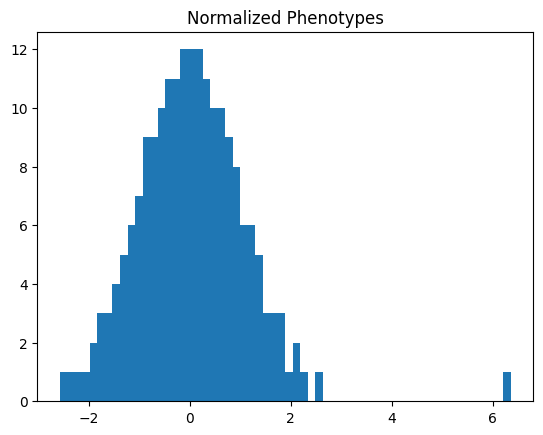

Mean of phenotypes: 0.03180670444848708
Standard deviation of phenotypes: 1.0757478165020662


In [7]:
plt.hist(quantile_normalize_phenotype_df["normalized_phenotype"], bins=60)
plt.title("Normalized Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(quantile_normalize_phenotype_df['normalized_phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(quantile_normalize_phenotype_df['normalized_phenotype'].std()))

In [8]:
quantile_normal_genetic_df = quantile_normalize(phenotype_df_1, phenotype_normalize=False)
quantile_normal_genetic_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value
0,0,0,-16.501664,-37.884400,-54.386064,-0.398855
1,0,1,-2.454348,-13.641399,-16.095747,0.722479
2,0,2,-17.303803,-13.900429,-31.204232,-0.453762
3,0,3,6.641214,5.130642,11.771856,1.372204
4,0,4,-8.710213,-25.837209,-34.547421,0.189118
...,...,...,...,...,...,...
195,0,195,12.536488,-11.398125,1.138364,2.053749
196,0,196,16.549154,23.146199,39.695353,2.326348
197,0,197,5.463626,5.911569,11.375194,1.281552
198,0,198,-0.663779,-10.312820,-10.976599,0.806421


In [9]:
quantile_both_normalized = quantile_normalize(phenotype_df_2, normalize_both=True)
quantile_both_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value,normalized_phenotype
0,0,0,-16.501664,-37.884400,-54.386064,-0.398855,-2.326348
1,0,1,-2.454348,-13.641399,-16.095747,0.722479,-0.279319
2,0,2,-17.303803,-13.900429,-31.204232,-0.453762,-1.126391
3,0,3,6.641214,5.130642,11.771856,1.372204,1.174987
4,0,4,-8.710213,-25.837209,-34.547421,0.189118,-1.253565
...,...,...,...,...,...,...,...
195,0,195,12.536488,-11.398125,1.138364,2.053749,0.690309
196,0,196,16.549154,23.146199,39.695353,2.326348,2.575829
197,0,197,5.463626,5.911569,11.375194,1.281552,1.150349
198,0,198,-0.663779,-10.312820,-10.976599,0.806421,-0.025069


Now, we show the same for multivariate simulation.

In [10]:
mean_1 = np.zeros(2)
cov_1 = np.eye(2) 
model_normal_multi = grg_causal_mutation_model("multivariate normal", mean=mean_1, cov=cov_1)



In [11]:
trait_df_normal_multi = sim_grg_causal_mutation(grg_1, num_causal=1000, model=model_normal_multi, random_seed=1)
sample_nodes_df_multi = additive_effect_sizes(grg_1, trait_df_normal_multi)
individuals = samples_to_individuals(sample_nodes_df_multi)
phenotypes_user_defined_multi_normal = sim_env_noise(individuals, user_defined=True, means=mean_1, cov=cov_1) #simulates noise from the multivariate standard normal distribution with means of zero and an identity matrix for covariance
phenotypes_user_defined_multi_normal_df = phenotypes_user_defined_multi_normal.phenotype_df
phenotypes_user_defined_multi_normal_df_1 = phenotypes_user_defined_multi_normal_df.copy()
phenotypes_user_defined_multi_normal_df_2 = phenotypes_user_defined_multi_normal_df.copy()
phenotypes_user_defined_multi_normal_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-37.942379,0.361738,-37.580642
1,1,0,-23.087706,-0.392546,-23.480252
2,0,1,-19.908226,0.175608,-19.732619
3,1,1,-22.240029,-0.355389,-22.595418
4,0,2,-9.933216,-0.107169,-10.040386
...,...,...,...,...,...
395,1,197,6.632294,0.384818,7.017113
396,0,198,-28.121344,-0.079351,-28.200695
397,1,198,-17.527029,-1.160788,-18.687817
398,0,199,-10.601552,0.338451,-10.263101


In [12]:
quantile_normalized_multi_pheno = quantile_normalize(phenotypes_user_defined_multi_normal_df)
quantile_normalized_multi_pheno

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-37.942379,0.361738,-37.580642,-1.405072
1,1,0,-23.087706,-0.392546,-23.480252,-0.896473
2,0,1,-19.908226,0.175608,-19.732619,0.331853
3,1,1,-22.240029,-0.355389,-22.595418,-0.823894
4,0,2,-9.933216,-0.107169,-10.040386,1.253565
...,...,...,...,...,...,...
395,1,197,6.632294,0.384818,7.017113,1.554774
396,0,198,-28.121344,-0.079351,-28.200695,-0.538836
397,1,198,-17.527029,-1.160788,-18.687817,-0.524401
398,0,199,-10.601552,0.338451,-10.263101,1.174987


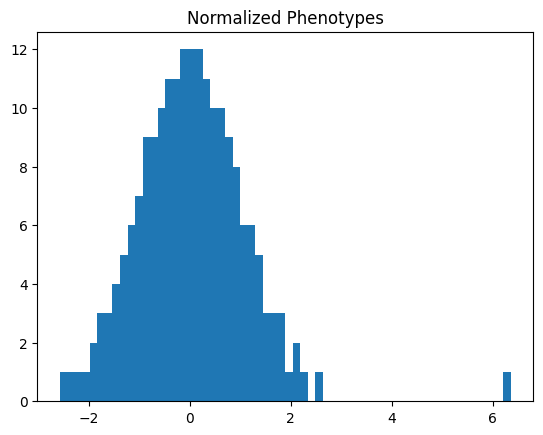

Mean of phenotypes: 0.03180670444848708
Standard deviation of phenotypes: 1.0757478165020662


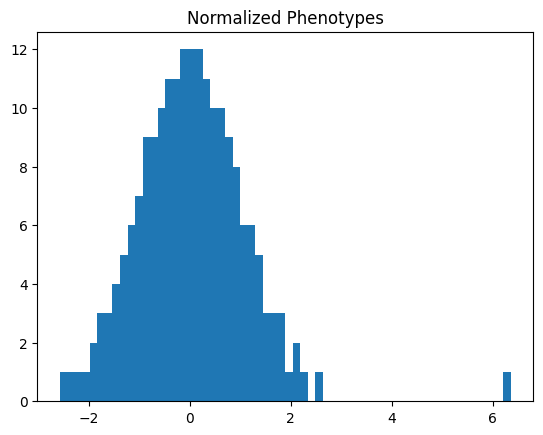

Mean of phenotypes: 0.03180670444848709
Standard deviation of phenotypes: 1.0757478165020662


In [13]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in quantile_normalized_multi_pheno.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["normalized_phenotype"], bins=60)
  plt.title("Normalized Phenotypes")
  plt.show()
  print("Mean of phenotypes: " + str(temp_df['normalized_phenotype'].mean()))
  print("Standard deviation of phenotypes: " + str(temp_df['normalized_phenotype'].std()))

In [14]:
quantile_normalized_multi_genetic = quantile_normalize(phenotypes_user_defined_multi_normal_df_1, phenotype_normalize=False)
quantile_normalized_multi_genetic

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value
0,0,0,-37.942379,0.361738,-37.580642,-1.372204
1,1,0,-23.087706,-0.392546,-23.480252,-0.915365
2,0,1,-19.908226,0.175608,-19.732619,0.318639
3,1,1,-22.240029,-0.355389,-22.595418,-0.823894
4,0,2,-9.933216,-0.107169,-10.040386,1.253565
...,...,...,...,...,...,...
395,1,197,6.632294,0.384818,7.017113,1.554774
396,0,198,-28.121344,-0.079351,-28.200695,-0.524401
397,1,198,-17.527029,-1.160788,-18.687817,-0.453762
398,0,199,-10.601552,0.338451,-10.263101,1.150349


In [15]:
quantile_normalized_multi_both = quantile_normalize(phenotypes_user_defined_multi_normal_df_2, normalize_both=False)
quantile_normalized_multi_both

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-37.942379,0.361738,-37.580642,-1.405072
1,1,0,-23.087706,-0.392546,-23.480252,-0.896473
2,0,1,-19.908226,0.175608,-19.732619,0.331853
3,1,1,-22.240029,-0.355389,-22.595418,-0.823894
4,0,2,-9.933216,-0.107169,-10.040386,1.253565
...,...,...,...,...,...,...
395,1,197,6.632294,0.384818,7.017113,1.554774
396,0,198,-28.121344,-0.079351,-28.200695,-0.538836
397,1,198,-17.527029,-1.160788,-18.687817,-0.524401
398,0,199,-10.601552,0.338451,-10.263101,1.174987
